In [1]:
import yfinance as yf
from matplotlib import pyplot as plt

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00',
               '2023-11-21 00:00:00-05:00', '2023-11-22 00:00:00-05:00',
               '2023-11-24 00:00:00-05:00', '2023-11-27 00:00:00-05:00',
               '2023-11-28 00:00:00-05:00', '2023-11-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24094, freq=None)

<Axes: xlabel='Date'>

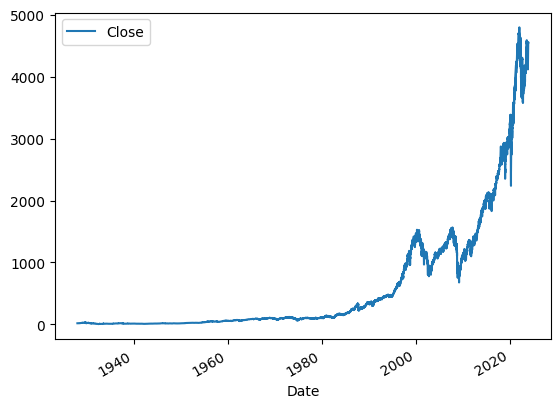

In [3]:
sp500.plot.line(y="Close", use_index=True)

In [4]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [5]:
# set up target
sp500["Tomorrow"] = sp500["Close"].shift(-10)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.tail(15)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-11-08 00:00:00-05:00,4384.370117,4391.200195,4359.759766,4382.779785,3729510000,4556.620117,1
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,4559.339844,1
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,4550.430176,1
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4554.890137,1
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4550.580078,1
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,NaN,0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,NaN,0
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,NaN,0
2023-11-20 00:00:00-05:00,4511.700195,4557.109863,4510.359863,4547.379883,3644790000,NaN,0


In [6]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8544 entries, 1990-01-02 00:00:00-05:00 to 2023-11-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      8544 non-null   float64
 1   High      8544 non-null   float64
 2   Low       8544 non-null   float64
 3   Close     8544 non-null   float64
 4   Volume    8544 non-null   int64  
 5   Tomorrow  8534 non-null   float64
 6   Target    8544 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 534.0 KB


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# not use cross validation / split train and test
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [8]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [9]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
print(precision_score(test["Target"], preds))
print(preds.head(5))

0.673469387755102
Date
2023-07-11 00:00:00-04:00    1
2023-07-12 00:00:00-04:00    0
2023-07-13 00:00:00-04:00    0
2023-07-14 00:00:00-04:00    0
2023-07-17 00:00:00-04:00    0
dtype: int64


<Axes: xlabel='Date'>

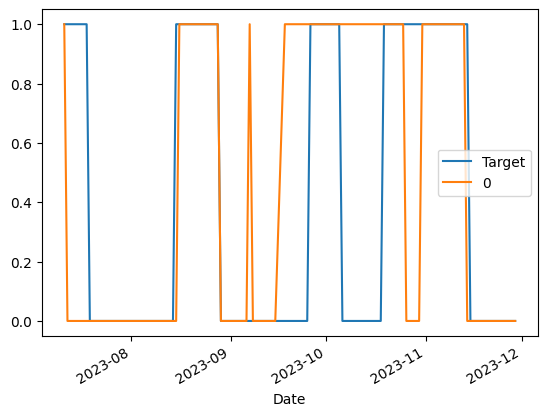

In [10]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [11]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [12]:
def backtest(data, model, predictor, start=2500, step=500):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [13]:
predictions = backtest(sp500, model, predictors)

In [14]:
predictions["Predictions"].value_counts()

Predictions
0    3283
1    2761
Name: count, dtype: int64

In [15]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5831220572256429

In [16]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.590172
0    0.409828
Name: count, dtype: float64

In [17]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_ratio{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [18]:
sp500 = sp500.dropna()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio2,Trend_2,Close_ratio5,Trend_5,Close_ratio60,Trend_60,Close_ratio250,Trend_250,Close_ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,470.579987,1,0.997157,2.0,0.996617,4.0,1.000283,38.0,1.028047,144.0,1.176082,570.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,468.640015,1,0.998681,2.0,0.995899,5.0,0.997329,38.0,1.025151,145.0,1.172676,571.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.450012,1,1.001621,2.0,0.999495,5.0,1.000311,38.0,1.028274,146.0,1.176163,572.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.440002,0,1.003270,2.0,1.004991,5.0,1.006561,38.0,1.034781,147.0,1.183537,573.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,466.890015,1,0.999431,1.0,1.003784,4.0,1.005120,37.0,1.033359,147.0,1.181856,573.0


In [19]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
predictions = backtest(sp500, model, new_predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0.0    3593
1.0    1441
Name: count, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6377515614156836

In [24]:
sp500['Target'].sum()/sp500.shape[0]

0.6028670029200955